In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/sample_data/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


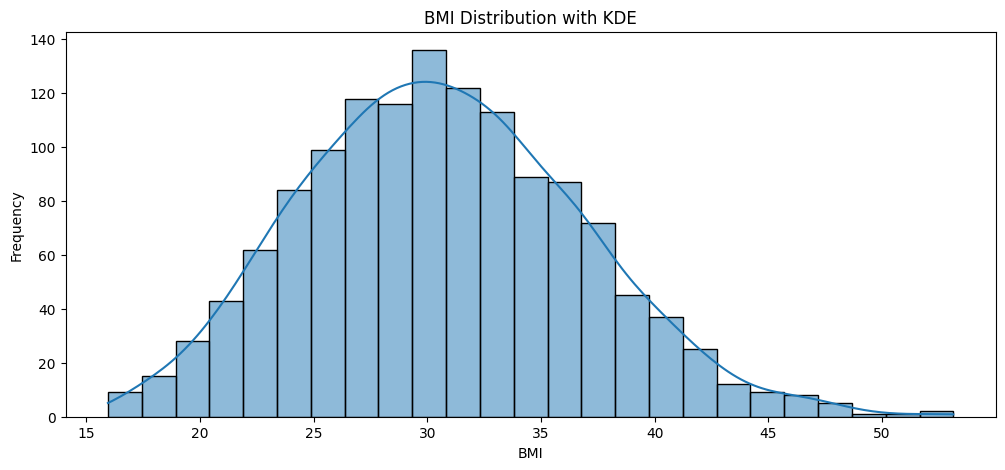

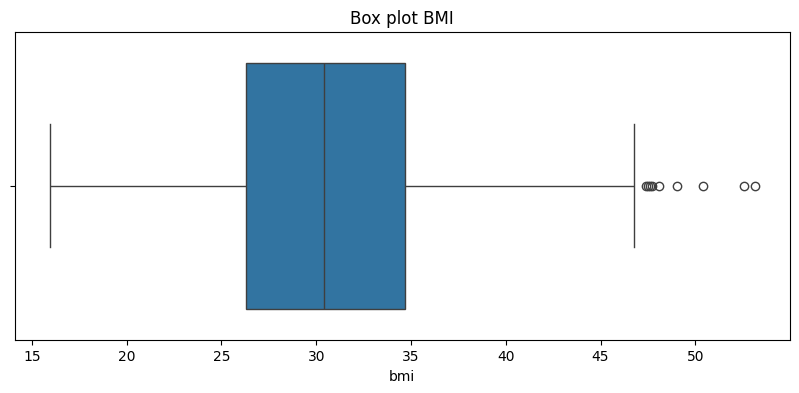

In [ ]:
plt.figure(figsize = (12,5))
sns.histplot(df['bm'], kde = True)
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize = (10,4))
sns.boxplot(x = df ['bmi'])
plt.title("Box plot BMI")
plt.show()

In [ ]:
#remove the outlier

Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: 13.822499999999998
Upper Bound: 46.8825


In [ ]:
df.drop_duplicates(inplace = True)

/tmp/ipython-input-3424306917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [ ]:
#clipping outliers
df_cleaned = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]


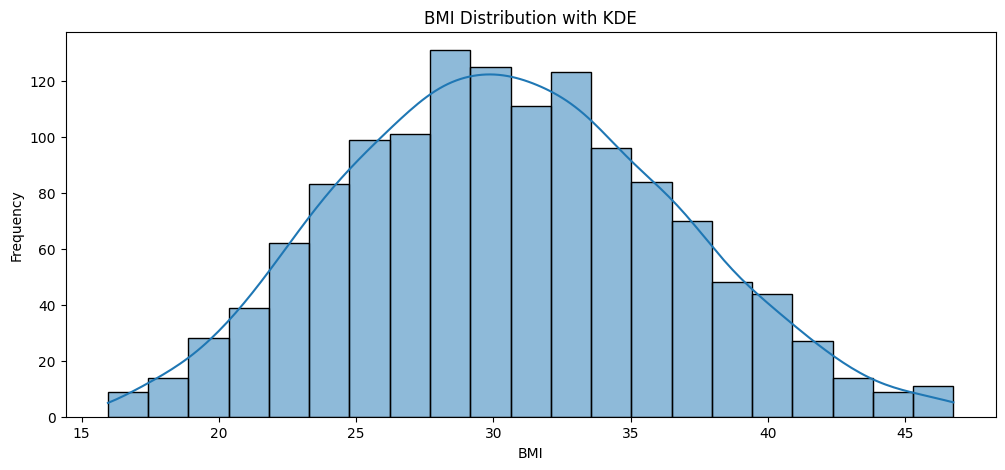

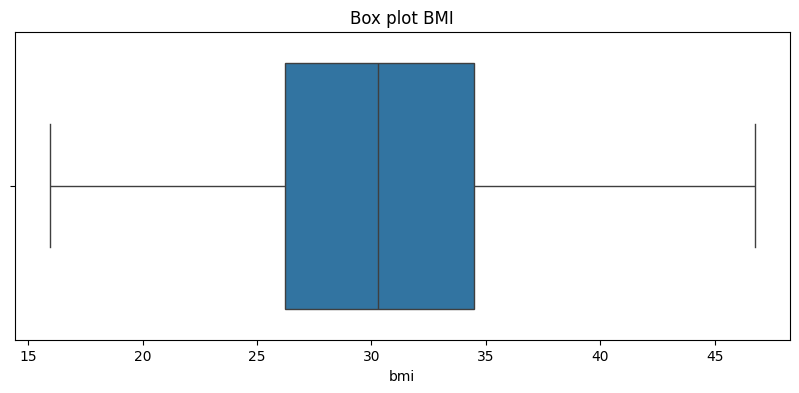

In [ ]:
plt.figure(figsize = (12,5))
sns.histplot(df_cleaned['bmi'], kde = True)
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize = (10,4))
sns.boxplot(x = df_cleaned ['bmi'])
plt.title("Box plot BMI")
plt.show()

In [ ]:
#One hot encoding

df_cleaned = pd.get_dummies(df_cleaned, columns = ['sex', 'smoker', 'region'], drop_first = True)
df_cleaned

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [ ]:
df_cleaned.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.114785,0.042103,0.301317,-0.018089,-0.025075,0.001624,-0.012249,0.009868
bmi,0.114785,1.000000,0.017366,0.193270,0.039966,-0.002868,-0.128760,0.255903,0.000655
children,0.042103,0.017366,1.000000,0.069125,0.019973,0.007234,0.025449,-0.019239,0.019641
charges,0.301317,0.193270,0.069125,1.000000,0.064161,0.785896,-0.036482,0.071191,-0.046341
sex_male,-0.018089,0.039966,0.019973,0.064161,1.000000,0.080269,-0.011291,0.010721,-0.000771
smoker_yes,-0.025075,-0.002868,0.007234,0.785896,0.080269,1.000000,-0.035315,0.068055,-0.039665
region_northwest,0.001624,-0.128760,0.025449,-0.036482,-0.011291,-0.035315,1.000000,-0.344453,-0.322709
region_southeast,-0.012249,0.255903,-0.019239,0.071191,0.010721,0.068055,-0.344453,1.000000,-0.344453
region_southwest,0.009868,0.000655,0.019641,-0.046341,-0.000771,-0.039665,-0.322709,-0.344453,1.000000


<Axes: >

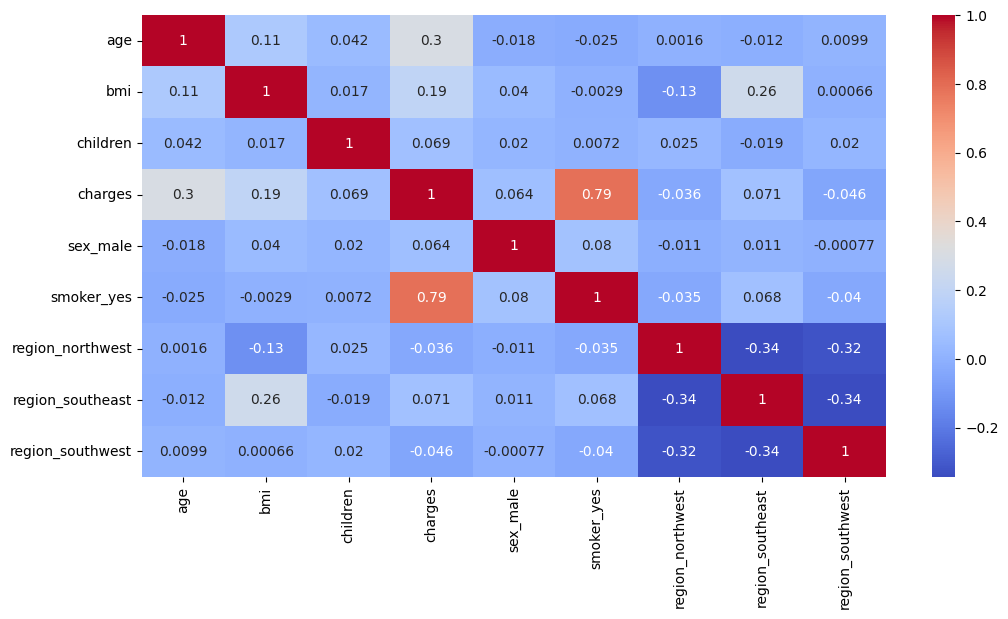

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df_cleaned.corr(),annot = True, cmap = 'coolwarm')


In [ ]:
df_cleaned.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
x = df_cleaned[['age','bmi','smoker_yes']]
y = df_cleaned['charges']
x
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [ ]:
from sklearn.metrics import r2_score

print(f' Testing results : {r2_score(y_test, y_pred)}')
print(f' Training results : {r2_score(y_train, y_train_pred)}')

 Testing results : 0.7488004023499726
 Training results : 0.7455760106931366


In [ ]:
from sklearn.metrics import mean_squared_error

print(f' Testing results : {mean_squared_error(y_test, y_pred)}')
print(f' Training results : {mean_squared_error(y_train, y_train_pred)}')

 Testing results : 34916425.2612677
 Training results : 36901822.67076611


In [ ]:
import pickle
open_file = open('model.pkl', 'wb')
pickle.dump(model, open_file)
open_file.close()